# What is Data Munging?
Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

# Why Do We Need to Know How to Data Wrangle or Data Munge?
“Even when they can get their hands on the right data, data scientists need to time to explore and understand it. The data may be in a format that can’t be easily analyzed, and with little to no metadata to help, the data scientist may need to seek advice from the data owner. After all this, the data still needs to be prepared for analysis. This involves formatting, cleaning and sampling the data. In some cases, scaling, decomposition and aggregation transformations are required before data scientists are ready to start training the models.”

https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html

# 80/20 Rule in Data Science
“The reason data scientists are hired in the first place is to develop algorithms and build machine learning models—and these are typically the parts of the job that they enjoy most. Yet in most companies today, 80 percent of a data scientist’s valuable time is spent simply finding, cleaning and reorganizing huge amounts of data.” Only 20 percent of their time is spent on actual data analysis. Without the right tools, this task is insurmountable."
https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html

- Data Munging Part I: Working With Missing Values
- Data Munging Part II: Put two datasets together to create one dataset


# Lab 8 Data Munging: Part I

In this lab we will learn how to do two things:

1. Work with dataset that is missing values
2. Use regex to remove html tags from your data

For this lab, we'll need these libraries:

1. Pandas: We will need Pandas to navigate our dataframe and check for each column’s data type, null values, and unique values.
2. NumPy: This package is essential for any data science project. It has a lot of mathematical functions that operate on multi-dimensional arrays and data frames.
3. Matplotlib & Seaborn: They are plotting and graphing libraries that we will use to visualize data in an intuitive way.

Note: regex are tricky. Practice regex more using other tutorials like those at datacamp and tutorialspoint


In [220]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn           as sns

# Loading the Data
Let’s load our data

# Question 1. Write the code to load in the jeopardy.csv into your Notebook
# Question 1a. Write the shape function to view the total rows and columns in your data
Note: You should upload your jeopardy.csv into its own folder caleld data OR
upload it into it's current folder

In [221]:
jeopardy = pd.read_csv("jeopardy_df.csv")
print(jeopardy.shape)

(19999, 7)


# Question 1b. Why might it be better toinclude all your data files under there own directory? Write the answer below.

Now let's take a look at the data

# Question 2. Write the code that prints a summary of the dataframe

In [222]:
jeopardy.sample(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
18929,5601,1/5/09,Jeopardy!,SONGS FROM MUSICALS,$400,"""The Music Of The Night"" & ""All I Ask Of You""",Phantom of the Opera
17532,5822,12/29/09,Double Jeopardy!,ACTORS & THEIR ROLES,"$1,200",Larry Gigli & George Reeves,Ben Affleck
8540,5443,4/16/08,Double Jeopardy!,MARK TWAIN: BOOK LOVER,"$1,600","""The only poem I have ever carried about with ...",the Rubaiyat of Omar Khayyam
7172,3191,6/15/98,Jeopardy!,MOVIE DEBUTS,$100,She debuted in a bit part as Woody Allen's dat...,Sigourney Weaver
1278,4936,2/13/06,Double Jeopardy!,WOMEN ON U.S. STAMPS,$400,1902: The first First Lady,Martha Washington
13703,5862,2/23/10,Double Jeopardy!,INFO PLEASE,$400,Number of feet in a mile,"5,280"
14253,5591,12/22/08,Double Jeopardy!,WAXING POETIC,"$2,000","This Quaker poet wrote of a ""barefoot boy, wit...",John Greenleaf Whittier
8600,6231,10/24/11,Jeopardy!,ALSO SOMETHING YOU WEAR,$200,A hard blow or punch,a sock
11115,4300,4/18/03,Double Jeopardy!,"PARLEZ-VOUS FRANC""A""?","$1,600",(Jimmy of the Clue Crew in Paris) The 7th of ...,arrondissements
6563,3358,3/24/99,Double Jeopardy!,STOCK SYMBOLS,$600,"Add ""YBOY"" to this 3-letter symbol to get the ...",PLA


# Question 3. Write the code that prints the first 25 rows of the dataframe

In [223]:
jeopardy.loc[:24]

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,12/31/04,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,12/31/04,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


Now that we've seen a summary of the dataset, it may be necessary to view an entire column of data
To print the entire Category column, I would normally write:
print(jeopardy['Category'))

What if I wanted to print the Category value for Row number 205?


# Question 4. Write the code to print the Category, Question, and Answer values for Row Number 205

In [224]:
filtered_jeopardy = jeopardy[[' Category', ' Question', ' Answer']]
print(filtered_jeopardy.loc[205:205])

     Category                                           Question       Answer
205    ALASKA  4 different species of bears live in Alaska:  ...  Polar bears


You should have received an error. What possibly could have went wrong?
 
# Question 5. Post the error below (if any)
Answer: SyntaxError


# Question 6. What's the problem with all of the category names in our dataset?
Answer: They all have a space before the rest of the string.

# Let's begin our Exploratory Data Analysis

Exploratory data analysis may involve removing extra spaces or cleaning up your data.
It may also involve visualizing the data. 
In order to do that though, you may need to remove missing values, whitespace, or other errors that may occur in the dataset.

# Removing Leading Whitespace

Sometimes you will receive a dataset that has trailing or ending whitespace that occurs with the column names. This commonly occurs if data is scraped from the web.  
This will cause errors to occur when trying to extract data from columns.
There are two ways you can do this:

1. Rename the column names to what you want them to be or
2. Remove the whitespace in the front

In some cases you may spend too much time trying to figure out what is going on with your column names. May be just easier to rename them. 

We're going to do both in this Lab

When removing whitespace we can use the str.replace function
jeopardy.columns=jeopardy.columns.str.replace(' ', '')

# Question 7. Write the code to remove the whitespace that occurs in the jeopardy dataframe for all columns

In [225]:
def replace_column(table):
    table.columns=table.columns.str.replace(' ', '')
replace_column(jeopardy)
jeopardy.columns

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

#  Question 8. Write the code to print the 205th row in the jeopardy dataframe for the Category, Question, and Answer columns

In [226]:
filtered_jeopardy = jeopardy[['Category', 'Question', 'Answer']]
print(filtered_jeopardy.loc[205:205])

    Category                                           Question       Answer
205   ALASKA  4 different species of bears live in Alaska:  ...  Polar bears


Sometimes you will need to rename columns names so that they are more meaningful to your analysis.
To rename a column we can use the rename function

df.rename(columns={'Column To Be Renames': 'New Name Of Column'},
          inplace=True)

# Question 9. Write the code to rename the Category column to Genre. 

In [227]:
jeopardy = jeopardy.rename(columns={"Category" : "Genre"})
jeopardy.head()

,ShowNumber,AirDate,Round,Genre,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


# Question 10. Write the code to view the first column names and first ten rows of the data

In [228]:
jeopardy.loc[:9]

,ShowNumber,AirDate,Round,Genre,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,12/31/04,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,12/31/04,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


# Question 11. Put the code below to change the Genre column back to Category.
Make to use the head function to view your rename results


In [229]:
jeopardy = jeopardy.rename(columns={"Genre" : "Category"})
jeopardy.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


To begin exploratory analysis of the jeorpardy dataset, use the shape() function to return the dimensionality of the dataset or the total number of columns and rows of the dataframe.
df.shape()
where df is the name of the dataframe

# Question 12. Write the code to view the number of rows and columns in the dataframe jeopardy

In [230]:
jeopardy.shape

(19999, 7)

We see that our data has 20000 rows and 8 columns

When you printed the first 25 rows, did you see any missing values or Not A Number values?



There is an easier ways to check for missing values or Not A Number (NANs) in your dataframe rather than looking through the entire dataset manually. In some cases the missing values are shown as NaNs or just blank cells in the dataframe.

There are four ways:

# 1. Check for NAN under a single dataframe column
To do this you would use the command df['column_name'].isnull().values.any()
where df is the name of your dataframe and column_name is the name of the column

Let's check for missing value under the Answer column

# Question 13. Write the code to check for missing values from the Answer column 

In [231]:
jeopardy['Answer'].isnull().values.any()

True

# Question 14. Are there NANs in the Answer column. Put your answer below

# (2) Count the NaN under a single DataFrame column:

df['your column name'].isnull().sum()

df is the name of your dataframe

In [232]:
jeopardy['Answer'].isnull().sum()

2

In [233]:
"Answer: There are NaN values."

'Answer: There are NaN values.'

# Question 15. Count the NAN under the Category column. Write your answer below and run the output

In [234]:
jeopardy['Category'].isnull().sum()

0

# (3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

df is the name of your dataframe


# Question 16. Write the answer to check the entire jeopardy dataframe for NANs.


In [235]:
jeopardy.isnull().values.any()

True

# (4) Count the NaN under an entire DataFrame:

df.isnull().sum().sum()

df is the name of the dataframe

# Question 17. Write the answer to count the number of missing values from the entire DataFrame

Note: You can use isna or isnull


In [236]:
jeopardy.isnull().sum().sum()

6

There are missing values that need to be dealt with 
In some cases you can replace them all if the data for each column was the same. ie all strings or all numbers.

# Question 18. How would you treat replacing all of the missing values in your jeopardy dataset? What about for columns that are strings? What about for columns that are values?

Answer: 
The Nan Values are are in Round, Value, Question and Answer. For Value if it is in string, I can replace it to int/float and take an average of values for the particular show number. For Question and Answer, I think it is better to drop those rows since we will not know what it is. For Round I think it is better to drop the row where it is missing as well since we cannot make an estimate.


# Getting the Index or indices of the missing values in your dataframe
df[df['column_name'].isnull()]

Note: Characters such as empty strings ‘’ or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

# Question 19. # Write the code to get the indices of the missing values in the jeopardy dataframe for the columns Question, Answer, Round, Value, Category

In [237]:
indices = []
question_indices = list(np.where(jeopardy['Question'].isnull())[0])  
answer_indices = list(np.where(jeopardy['Answer'].isnull())[0])  
round_indices = list(np.where(jeopardy['Round'].isnull())[0])  
value_indices = list(np.where(jeopardy['Value'].isnull())[0])  

indices.extend(question_indices)
indices.extend(answer_indices)
indices.extend(round_indices)
indices.extend(value_indices)

indices

[321, 388, 112, 260, 174, 588]

# More Dealing with Missing Data 

In most cases you will drop or delete those rows from the dataset that you  are analyzing

However, if you yare dealing with a datset that is small and you need all the data necessary to analyze the problem, you may want to check back with the datasource to look for those missing values.

In some easier cases you can check online resources to try and fill in the missing data. This is tricky those because the data on the internet is not always correct and you are taking a chance in using the values you find in your analysis.

# Let's remove the missing values from our dataframe and print the number of rows in the dataset after removing missing data rows
To do this we use the drop function and the syntax:
    df.drop(index_list, inplace=True)
    
   where df is the data frame and the index_list is an array of row indices to remove from the data frame

In [238]:
missing = indices 
jeopardy.drop(missing, inplace=True)
jeopardy.shape

(19993, 7)

# Now the easy way to drop missing values from your dataframe
You can also use the dropna command 

df.dropna(inplace = True) 

where df is the dataframe

# Let's move on to visualizing aspects about the data now that values are not missing
1. Visualize the top 10 answers

Japan        22
Australia    19
India        19
Canada       19
China        19
Name: Answer, dtype: int64


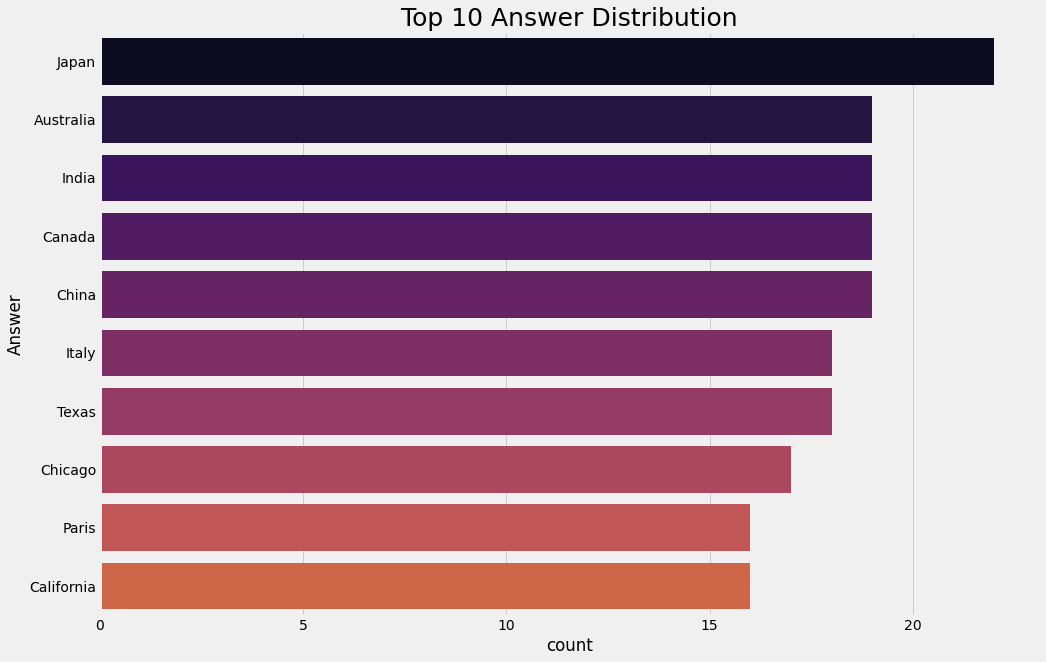

In [239]:
# Edit the code below to create a variable called top_10 that takes the top ten answers from the Answer column
top_10 = jeopardy['Answer'].value_counts()[:10]
print(top_10.head())

mask = jeopardy['Answer'].map(lambda x: x in top_10.index.tolist())
sns.countplot(y='Answer', data=jeopardy[mask], palette=sns.color_palette('inferno', 15), order=top_10.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Answer Distribution', size=25)
plt.show()

# Question 20. Describe what you think the value_counts function is doing below
Answer: Showing us the most asked questions.

# Explanation of the code above
The value_counts() function counts the number of answers that are the same.
This is stored in the variable top_10
The [:10] grabs the first ten rows in the dataframe

The rest of the code uses the seaborn library to create a horizontal bar to visuzlie the top 10 most common answers from the Jeopary dataset

[audio clue]                                                                   5
These "fell great oaks"                                                        2
Common in Dixie, a razorback is a wild one of these                            2
"His pride had cast him out from heaven, with all his host of rebel angels"    2
1967: "We rob banks"                                                           2
Name: Question, dtype: int64


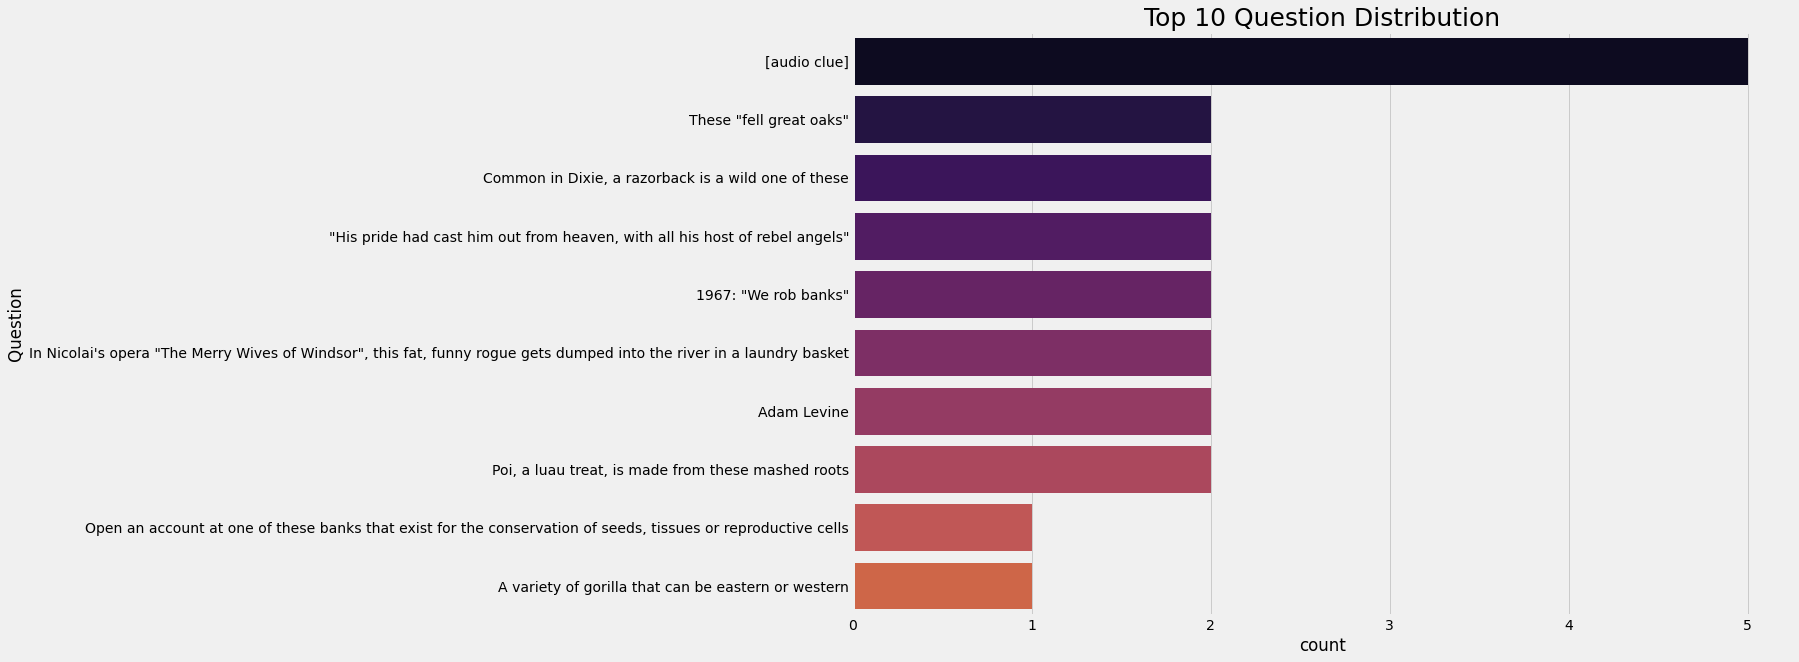

In [240]:
# Repeat the same process to get the top 10 most popular questions.

top_10_Q = jeopardy['Question'].value_counts()[:10]
print(top_10_Q.head())
mask = jeopardy['Question'].map(lambda x: x in top_10_Q.index.tolist())
data=jeopardy[mask]

sns.countplot(y='Question', data=jeopardy[mask], palette=sns.color_palette('inferno', 15), order=top_10_Q.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Question Distribution', size=25)
plt.show()

# Question 21. What do you notice about your Plot. Write the answer below
Audio clue is the most used question. That is becasue they are playing a clip. It might not even be the same audio clip

Answer: The method we used for Question 18 won't work for this question.  
Remove the [:10] from the end of value_counts()

# Write the code without the value_counts at the end

In [241]:
Q = jeopardy['Question'][:10]
Q

0    For the last 8 years of his life, Galileo was ...
1    No. 2: 1912 Olympian; football star at Carlisl...
2    The city of Yuma in this state has a record av...
3    In 1963, live on "The Art Linkletter Show", th...
4    Signer of the Dec. of Indep., framer of the Co...
5    In the title of an Aesop fable, this insect sh...
6    Built in 312 B.C. to link Rome & the South of ...
7    No. 8: 30 steals for the Birmingham Barons; 2,...
8    In the winter of 1971-72, a record 1,122 inche...
9    This housewares store was named for the packag...
Name: Question, dtype: object

# Notice that [audio clue] is included as a value for the Question column
We can only assume that Jeopardy provides a audio clue rather than a textual question to the contestant. This is not helpful for our analysis as it occurs five times in the dataset and the audio clip is not known.

This value is not useful and this row should be removed

# Question 22 . Write the code to remove the row with '[audio clue]' listed as a value for the Question column

In [242]:
audio_clue_indices = list(np.where(jeopardy['Question'] == '[audio clue]')[0])
audio_clue_indices

[19439, 19445, 19451, 19457, 19463]

In [243]:
jeopardy.drop(audio_clue_indices, inplace=True)
jeopardy.shape

(19988, 7)

# Text Preprocessing
Some of the values have URLs and HTML tags embedded within them
We will need to clean that up before we can analyze the data

We can use pandas regular expressions functions

Instead of munging the original data, it is better to copy the data into new column
This new column is called jeopardy['without_tags']

You should never overwrite the a column in your original dataset, rather add on to it because you'll never know if and when you'll need the original data to perform another operation.

# Question 23. Write the code to import the regular expression libary

In [244]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [245]:
# We will write a function called remove_tags to remove the html tags from any string you pass it
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
jeopardy['without_tags'] = jeopardy['Question'].apply(lambda cw :remove_tags(cw))
print("\nSentences without tags:")
print(jeopardy['without_tags'])


Sentences without tags:
0        For the last 8 years of his life, Galileo was ...
1        No. 2: 1912 Olympian; football star at Carlisl...
2        The city of Yuma in this state has a record av...
3        In 1963, live on "The Art Linkletter Show", th...
4        Signer of the Dec. of Indep., framer of the Co...
                               ...                        
19994    Of 8, 12 or 18, the number of U.S. states that...
19995                        ...& the New Power Generation
19996    In 1589 he was appointed professor of mathemat...
19997    Before the grand jury she said, "I'm really so...
19998    Llamas are the heftiest South American members...
Name: without_tags, Length: 19988, dtype: object


# Let's double-check our work to see if that worked
Write the code to print out the old Question column data for row 30 that still  had html tags in it. 

Name this variable old_html_data

In [246]:
old_html_data = jeopardy['Question'][29]
print(old_html_data)

<a href="http://www.j-archive.com/media/2004-12-31_DJ_23.mp3">Beyond ovoid abandonment, beyond ovoid betrayal... you won't believe the ending when he "Hatches the Egg"</a>


# Question 24. Write the code to print out the question column for row 30 without html in it. 
Name it new_data

In [247]:
new_data = remove_tags(old_html_data)
print(new_data)

Beyond ovoid abandonment, beyond ovoid betrayal... you won't believe the ending when he "Hatches the Egg"


# Making everything upper or lowercase
Sometimes you will need to compare strings. To easily compare strings you should convert them to either upper or lowercase

In [248]:
old_html_data.lower()

'<a href="http://www.j-archive.com/media/2004-12-31_dj_23.mp3">beyond ovoid abandonment, beyond ovoid betrayal... you won\'t believe the ending when he "hatches the egg"</a>'

In [249]:
old_html_data.upper()

'<A HREF="HTTP://WWW.J-ARCHIVE.COM/MEDIA/2004-12-31_DJ_23.MP3">BEYOND OVOID ABANDONMENT, BEYOND OVOID BETRAYAL... YOU WON\'T BELIEVE THE ENDING WHEN HE "HATCHES THE EGG"</A>'

# Question 25. Write the code to change the 'Answer' column to all lower case. 
Your new column should be called jeopardary['lower_answer']
Print row number 25 before and after turning to lower case

In [250]:
print(jeopardy.loc[24:24])
print()
jeopardy['lower_answer'] = jeopardy['Answer'].str.lower()
print(jeopardy.loc[24:24])

    ShowNumber   AirDate      Round Category    Value  \
24        4680  12/31/04  Jeopardy!  HISTORY  $1,000    

                                             Question              Answer  \
24  This Asian political party was founded in 1885...  the Congress Party   

                                         without_tags  
24  This Asian political party was founded in 1885...  

    ShowNumber   AirDate      Round Category    Value  \
24        4680  12/31/04  Jeopardy!  HISTORY  $1,000    

                                             Question              Answer  \
24  This Asian political party was founded in 1885...  the Congress Party   

                                         without_tags        lower_answer  
24  This Asian political party was founded in 1885...  the congress party  
